# Superlattice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

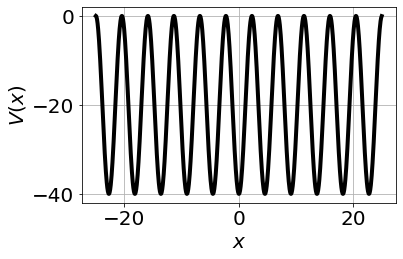

In [96]:
L = 50
N = 1000
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1]-x[0]

V0 = 20
nw = 11
q = (2*np.pi/L)*nw
V = -V0*(np.cos(q*x) + 1)

plt.plot(x, V, lw=4, c='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.grid()
plt.tight_layout()
plt.show()

## Build the kinetic operator as a tridiagonal matrix

In [97]:
T = -0.5*(np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=+1))/dx**2
# add periodic boundary conditions
T[0,-1] = T[-1,0] = -0.5/dx**2

## Solve the eigenproblem and plot the results

In [98]:
H = T + np.diag(V)
en, psi = np.linalg.eigh(H)

print('Each band has nw =', nw, 'states with energies: \n')

print('First  band:', 
      list(np.round(en[:3],4)), '...', 
      list(np.round(en[(nw-2):nw],4)))

print('Second band:', 
      list(np.round(en[nw:(nw+3)],4)), '...', 
      list(np.round(en[(2*nw-2):(2*nw)],4)))

print('Third  band:', 
      list(np.round(en[(2*nw):(2*nw+3)],4)), '...', 
      list(np.round(en[(3*nw-2):(3*nw)],4)))

Each band has nw = 11 states with energies: 

First  band: [-36.9728, -36.9728, -36.9728] ... [-36.9728, -36.9728]
Second band: [-31.0505, -31.0505, -31.0505] ... [-31.0505, -31.0505]
Third  band: [-25.4009, -25.4009, -25.4009] ... [-25.4009, -25.4009]


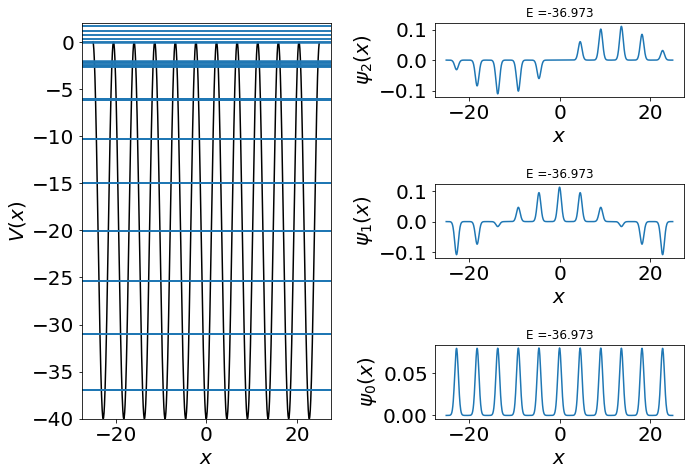

In [112]:
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.plot(x, V, c='black')
for n in range(100):
    plt.axhline(en[n], c='C0')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.ylim(-2*V0, V0/10)

for n in range(3): # 322 324 326
    plt.subplot(326 - 2*n)
    # select which band by starting the index as multiple of nw
    band = 0
    nwf = n + nw*band
    plt.title('E =' + str(np.round(en[nwf], 3)), fontsize=12)
    wf = psi[:, nwf]
    wf *= np.sign(psi[N//2, nwf])
    plt.plot(x, wf)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\psi_'+str(n)+'(x)$')

plt.tight_layout()
plt.show()